In [51]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import jax.scipy as jsp 
plt.rc("figure", figsize=[6,4], dpi=150, facecolor='w')

(-10.0, 10.0, -10.0, 10.0)

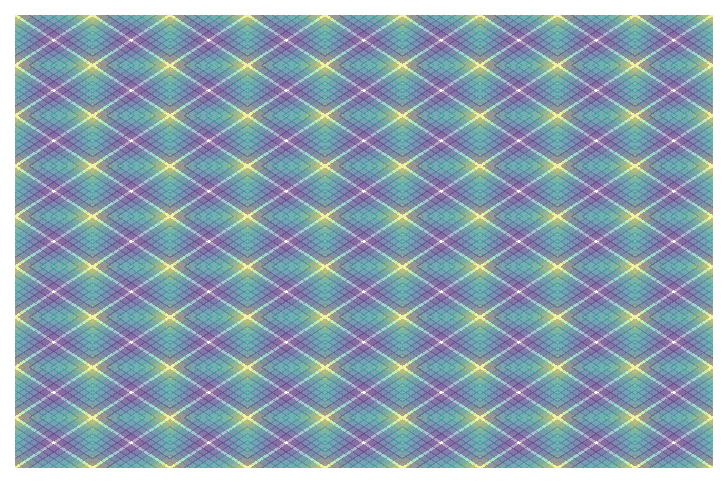

In [69]:
size = nx, ny = (10, 10)
x_grid = jnp.linspace(-10, 10, nx)
y_grid = jnp.linspace(-10, 10, ny)
xx, yy = jnp.meshgrid(x_grid, y_grid)
xy_pairs = jnp.hstack((xx.reshape(-1,1), yy.reshape(-1,1)))

def gaussian_2d_pdf(eval_points, mean, cov):
    return jsp.stats.multivariate_normal.pdf(eval_points, mean=mean, cov=cov)

vmapped_pdf = jax.vmap(gaussian_2d_pdf, in_axes=(None, 0, 0))
pdfs = vmapped_pdf(xy_pairs, xy_pairs, jnp.ones(len(xy_pairs))).reshape(len(xy_pairs), *size)

fig, ax = plt.subplots()
for pdf in pdfs:
    step = 0.02
    m = jnp.amax(pdf)
    levels = jnp.arange(0.0, m, step) + step
    ax.contourf(xx, yy, pdf, levels=levels, alpha=0.4)
plt.axis("off")

In [34]:
np.array([np.eye(2,2) for _ in xy_pairs]).shape

(100, 2, 2)

In [35]:
xy_pairs.shape

(100, 2)

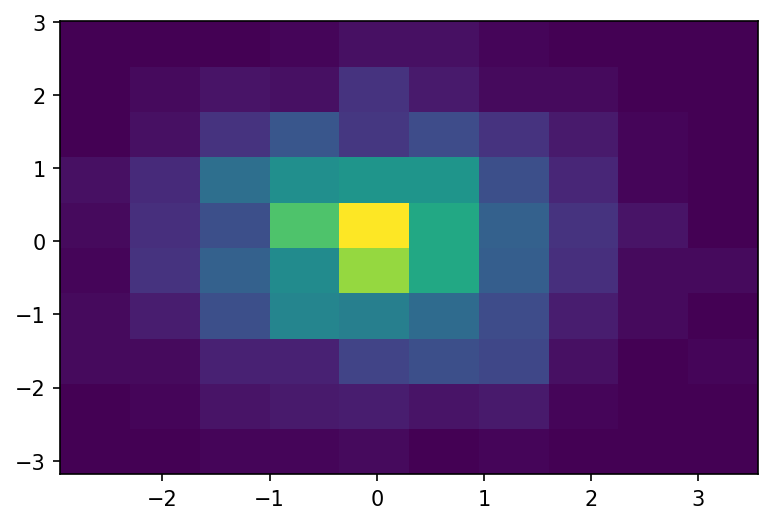

In [20]:
plt.hist2d(x,y);